In [77]:
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

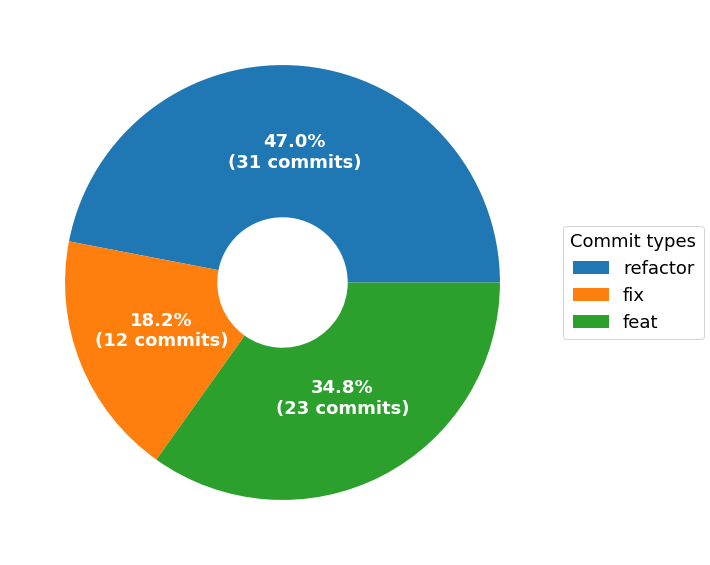

In [78]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

recipe = ["31 refactor", "12 fix", "23 feat"]

quantities = []
ingredients = []
for item in recipe:
    quantity, ingredient = item.split(' ')
    quantities.append(float(quantity))
    ingredients.append(ingredient)

def func(pct, allvals):
    absolute = float(pct * np.sum(allvals) / 100)
    return "{:.1f}%\n({:.0f} commits)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(quantities, wedgeprops=dict(width=0.7), autopct=lambda pct: func(pct, data), textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Commit types",
          loc="center left",
          fontsize=18,
          title_fontsize=18,
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=18, weight="bold")

plt.show()

32 32


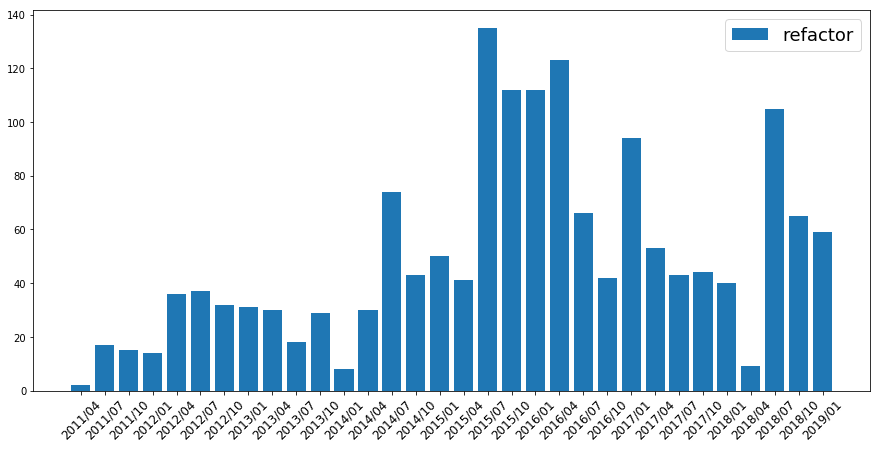

In [79]:
fig, ax = plt.subplots(figsize=(15, 7))

date = ["2011/04", "2011/07", "2011/10",
       "2012/01", "2012/04", "2012/07", "2012/10",
       "2013/01", "2013/04", "2013/07", "2013/10",
       "2014/01", "2014/04", "2014/07", "2014/10",
       "2015/01", "2015/04", "2015/07", "2015/10",
       "2016/01", "2016/04", "2016/07", "2016/10",
       "2017/01", "2017/04", "2017/07", "2017/10",
       "2018/01", "2018/04", "2018/07", "2018/10",
       "2019/01"]
feat = [2, 17, 15, 14, 36, 37, 32, 31, 30, 18, 29, 8, 30, 74, 43, 50, 41, 135, 112, 112, 123, 66, 42, 94, 53, 43, 44, 40, 9, 105, 65, 59]
print(len(date), len(feat))

b = ax.bar(x=date, height=feat, width=0.8)
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.legend((b,), ('refactor',), fontsize=18)

plt.show()

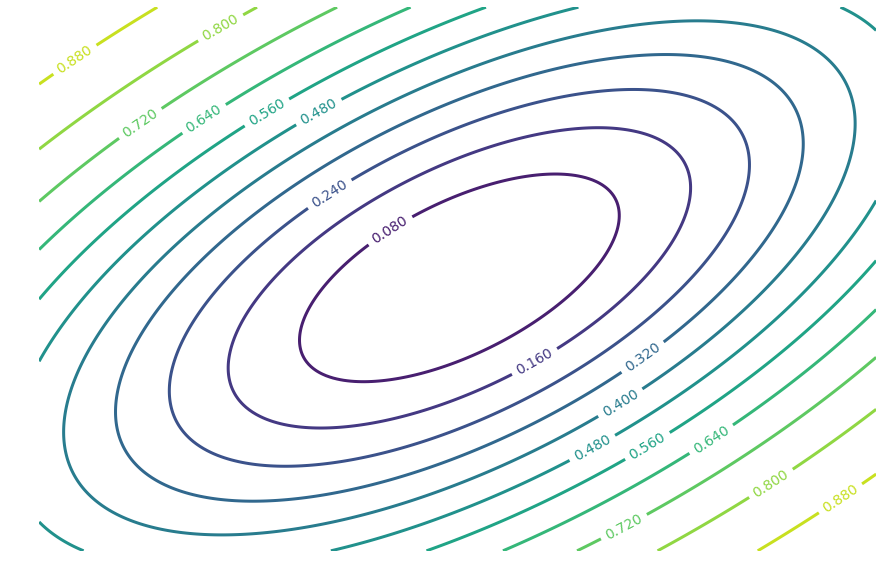

In [156]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)

Z = 1 - np.exp(-(0.01 * (3*X - Y) ** 2 + 0.01 * (3*Y - X) ** 2))

fig, ax = plt.subplots(figsize=(15, 10))
CS = ax.contour(X, Y, Z, levels=12, linewidths=3, antialiased=True)
ax.clabel(CS, inline=1, fontsize=14)

# ax.get_xaxis().set_visible(False) # Hide the X axis
# ax.get_yaxis().set_visible(False) # Hide the Y axis
ax.set_axis_off() # Hide the axis

ax.get_xaxis().set_ticks([]) # only hide the labels
ax.get_yaxis().set_ticks([]) # only hide the labels

plt.xlabel('X1', fontsize=18, labelpad=10)
plt.ylabel('X2', fontsize=18, rotation=0, labelpad=20)
# plt.grid(True)
plt.show()

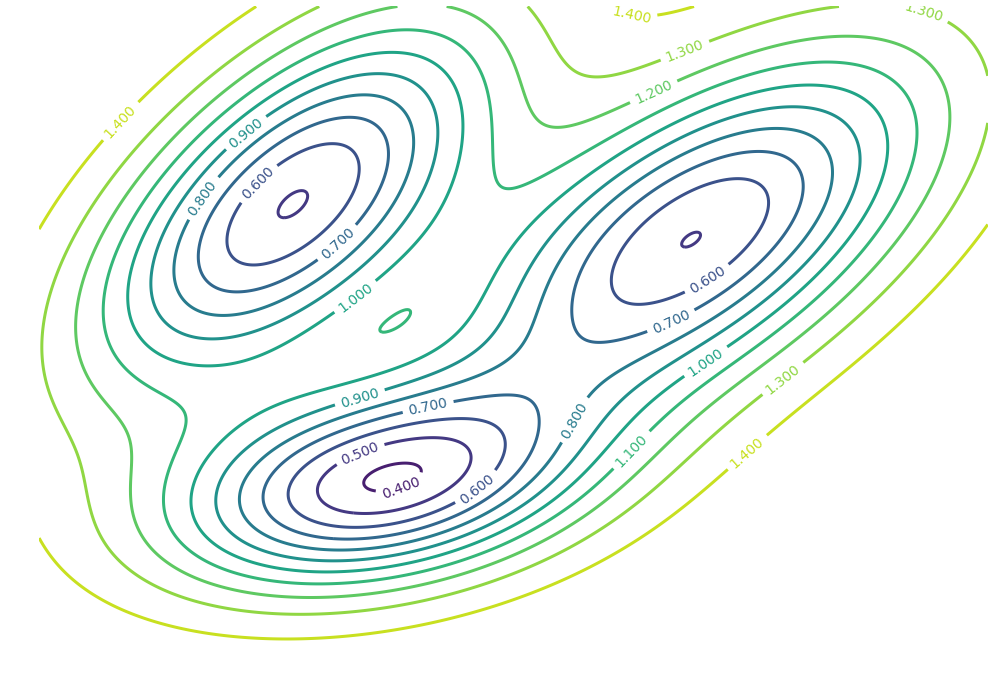

In [261]:
delta = 0.025
x = np.arange(-8.0, 8.0, delta)
y = np.arange(-6.0, 8.0, delta)
X, Y = np.meshgrid(x, y)

Z = 1.5 - np.exp(-(0.01 * (3*(X-2) - Y) ** 2 + 0.01 * (3*(Y-2) - X) ** 2)) \
        - np.exp(-(0.01 * (3*(X+5) - Y) ** 2 + 0.01 * (3*(Y-5) - X) ** 2)) \
        - np.exp(-(0.01 * (3*(X+2) - 0.5 * Y) ** 2 + 0.01 * (4*(Y+2) - 0.5 * X) ** 2))

Z = 1.5 - np.exp(-(0.01 * (3*(X-2) - Y) ** 2 + 0.01 * (3*(Y-2) - X) ** 2)) \
        - np.exp(-(0.015 * (3*(X+5) - Y) ** 2 + 0.01 * (3*(Y-5) - X) ** 2)) \
        - np.exp(-(0.01 * (3*(X+2) - 0.5 * Y) ** 2 + 0.015 * (4*(Y+2) - 0.5 * X) ** 2))

fig, ax = plt.subplots(figsize=(17, 12))
CS = ax.contour(X, Y, Z, levels=12, linewidths=3, antialiased=True)
ax.clabel(CS, inline=1, fontsize=14)

# ax.get_xaxis().set_visible(False) # Hide the X axis
# ax.get_yaxis().set_visible(False) # Hide the Y axis
ax.set_axis_off() # Hide the axis

ax.get_xaxis().set_ticks([]) # only hide the labels
ax.get_yaxis().set_ticks([]) # only hide the labels

plt.xlabel('X1', fontsize=18, labelpad=10)
plt.ylabel('X2', fontsize=18, rotation=0, labelpad=20)
# plt.grid(True)
plt.show()

In [185]:
import math
import torch
import torch.nn as nn

In [231]:
"""
Investigating how CrossEntropyLoss works
"""

criterion = nn.CrossEntropyLoss()  

# Get what you want in first entry, not in the second
got1 = torch.FloatTensor([[1 - 0.91, 0.91], [1 - 0.77, 0.77]])
expected1 = torch.LongTensor([1, 0])
print(criterion(got1, expected1))

# Decomposition of the Cross Entropy
got2 = torch.FloatTensor([[1 - 0.91, 0.91], [1 - 0.77, 0.77]])
expected2 = torch.LongTensor([1, 0])
print(nn.NLLLoss()(nn.LogSoftmax(dim=1)(got2), expected2))

# What I would have hoped to get (but then it is normal, the Cross Entropy does not work on probabilities)
what_i_wanted = - math.log(0.91) - math.log(0.23)
print(what_i_wanted)

# So I am trying here to reproduce the same result
# - first create a vector with values that will lead to the expected softmax
# - then check with the cross entropy
# 
# The trick to create the values is that:
#
#   exp y1 / (exp y1 + exp y2) = p
#   (1 - p) exp y1 = p exp y2
#   exp y2 = (1 - p) / p * exp y1
#   y2 = log ((1 - p) / p) + y1

softmax = nn.Softmax(dim=1)
log_softmax = nn.LogSoftmax(dim=1)
nll_loss = nn.NLLLoss()

constant = 0.
got5 = torch.FloatTensor([
    [constant + math.log((1. - 0.91) / 0.91), constant],
    [constant + math.log((1. - 0.77) / 0.77), constant]
])

print("Softmax of", got5, "is", softmax(got5))
print("Log Softmax of", got5, "is", log_softmax(got5))
expected5 = torch.LongTensor([1, 0])

print(criterion(got5, expected5))
print(nll_loss(log_softmax(got5), expected5))

# In fact, pytorch divides by the number of examples
print(nll_loss(log_softmax(got5), expected5) * 2)

tensor(0.6821)
tensor(0.6821)
1.563986649530183
Softmax of tensor([[-2.3136,  0.0000],
        [-1.2083,  0.0000]]) is tensor([[0.0900, 0.9100],
        [0.2300, 0.7700]])
Log Softmax of tensor([[-2.3136,  0.0000],
        [-1.2083,  0.0000]]) is tensor([[-2.4079, -0.0943],
        [-1.4697, -0.2614]])
tensor(0.7820)
tensor(0.7820)
tensor(1.5640)


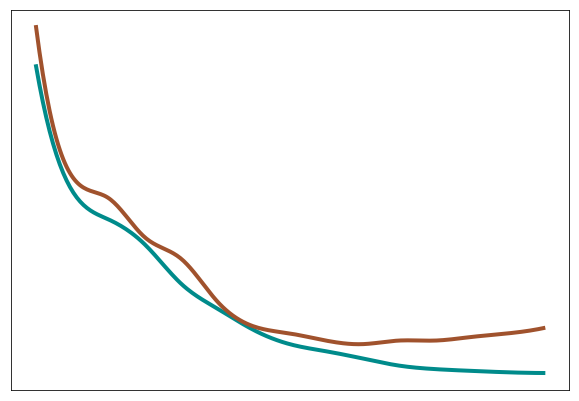

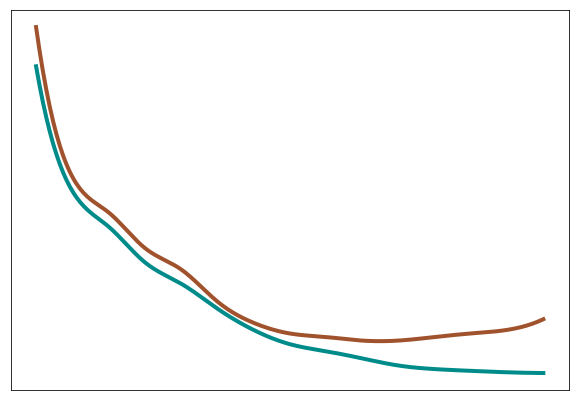

In [356]:
"""
Displaying training loss / validation loss curves
"""

from scipy.interpolate import make_interp_spline

def display(xs, training, validation):
    # Interpolation
    xnew = np.linspace(xs.min(),xs.max(), 300)
    training = make_interp_spline(xs, training, k=3)(xnew)
    validation = make_interp_spline(xs, validation, k=3)(xnew)
    
    # Training time
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(xnew, training, linewidth=4, color="darkcyan")
    ax.plot(xnew, validation, linewidth=4, color="sienna")
    ax.get_xaxis().set_ticks([]) # only hide the labels
    ax.get_yaxis().set_ticks([]) # only hide the labels
    plt.plot()

training = np.array(  [10, 6.5, 5.7, 5.0, 3.9, 3.2, 2.6, 2.2, 2.0, 1.8, 1.6, 1.5, 1.45, 1.41, 1.39])
validation = np.array([11, 6.8, 6.2, 5.1, 4.5, 3.3, 2.6, 2.4, 2.2, 2.1, 2.2, 2.2, 2.3, 2.4, 2.55]) + 0.1
xs = np.array(range(len(training)))
display(xs, training, validation)

training = np.array(  [10, 6.5, 5.5, 4.5, 3.9, 3.2, 2.6, 2.2, 2.0, 1.8, 1.6, 1.5, 1.45, 1.41, 1.39])
validation = np.array([11, 6.8, 5.8, 4.8, 4.2, 3.3, 2.7, 2.4, 2.3, 2.2, 2.2, 2.3, 2.4, 2.5, 2.8]) + 0.1
xs = np.array(range(len(training)))
display(xs, training, validation)

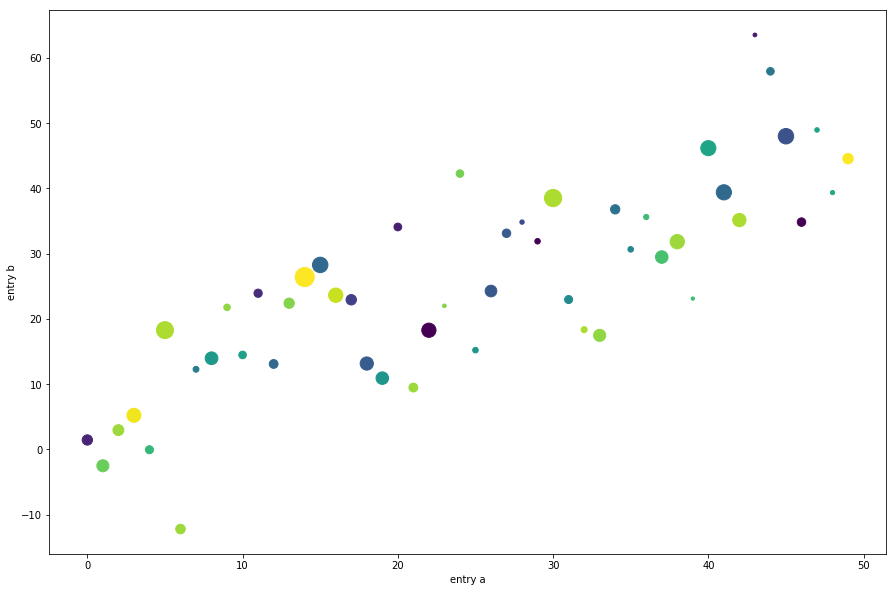

In [366]:
"""
Experimentations with scatter plot from
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
"""

data = {'x': np.arange(50),
        'color': np.random.randint(0, 50, 50),
        'diameter': np.random.randn(50)}

data['y'] = data['x'] + 10 * np.random.randn(50)
data['diameter'] = np.abs(data['diameter']) * 150

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter('x', 'y', c='color', s='diameter', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')
plt.show()

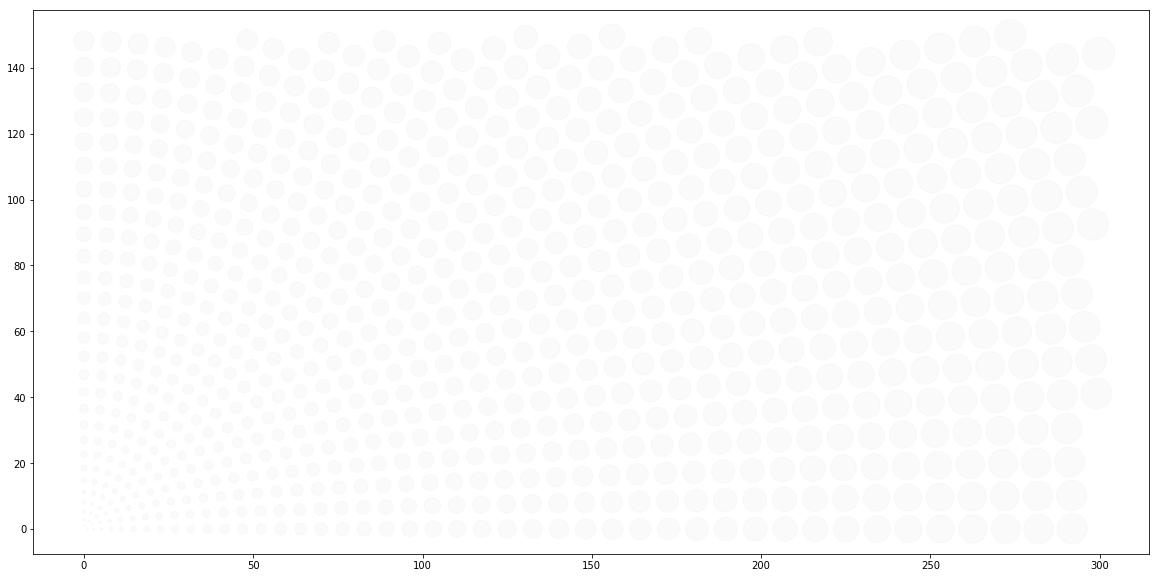

In [423]:
import math

xs = []
ys = []
size = []
colors = []

nb_points_by_level = 1
for distance_i in range(50):
    for i in range(nb_points_by_level+1):
        angle = i / (nb_points_by_level * 4) * math.pi * 2
        distance = distance_i ** 1.5
        x = distance * math.cos(angle)
        y = distance * math.sin(angle)
        if x <= 300 and y <= 150:
            xs.append(x)
            ys.append(y)
            size.append(distance_i ** 1.8)
            # colors.append(np.random.randint(0, 50, 1)[0])
            colors.append('lightgrey')
    nb_points_by_level += 1

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(xs, ys, s=size, c=colors, alpha=0.1, marker='o')
plt.show()

c:\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


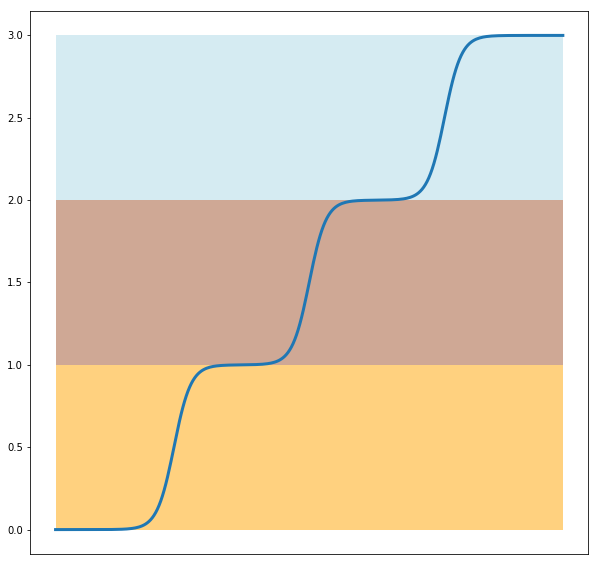

In [460]:
lo, hi = -30, 30
xs = np.linspace(lo, hi, 300.)
ys = 1 / (1 + np.exp(-(xs+16))) + 1 / (1 + np.exp(-(xs))) + 1 / (1 + np.exp(-(xs-16)))

fig, ax = plt.subplots(figsize=(10, 10))
ax.fill_between([lo, hi], 0, [1, 1], alpha=0.5, facecolor='orange')
ax.fill_between([lo, hi], 1, [2, 2], alpha=0.5, facecolor='sienna')
ax.fill_between([lo, hi], 2, [3, 3], alpha=0.5, facecolor='lightblue')
ax.plot(xs, ys, linewidth=3)

ax.get_xaxis().set_ticks([]) # only hide the labels
plt.show()